<a href="https://colab.research.google.com/github/kcarnold/fastbook/blob/master/images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Downloading images
> How to create an image dataset for chapter 2 of the book

In chapter 2 of the [Deep Learning for Coders book](https://www.amazon.com/Deep-Learning-Coders-fastai-PyTorch/dp/1492045527) (and lesson 3 of [the course](https://course.fast.ai)) we show how to download images with the Bing Image Search API.

You can get more information about this API from the [official website](https://www.microsoft.com/en-us/bing/apis/bing-image-search-api). If you're having trouble signing up for the service, there is some [more information](https://forums.fast.ai/t/getting-the-bing-image-search-key/67417) on the forum.

## DuckDuckGo

Alternatively, you can use [DuckDuckGo](https://duckduckgo.com/) instead of Bing. DuckDuckGo is a "privacy first" search service, with many useful features. However, they do not have an official API, so the function we'll show here relies on the particular structure of their web interface, which may change.

To use DuckDuckGo to download images, use the `search_images_ddg` function from `fastbook`, like so:

In [ ]:
!pip install fastbook

     |████████████████████████████████| 727kB 4.3MB/s 
     |████████████████████████████████| 51kB 4.7MB/s 
     |████████████████████████████████| 194kB 8.7MB/s 
     |████████████████████████████████| 1.2MB 8.0MB/s 
     |████████████████████████████████| 61kB 4.8MB/s 
  Found existing installation: fastai 1.0.61
    Uninstalling fastai-1.0.61:
      Successfully uninstalled fastai-1.0.61


In [ ]:
from fastbook import *

def search_images_ddg(key,max_n=200):
     """Search for 'key' with DuckDuckGo and return a unique urls of 'max_n' images
        (Adopted from https://github.com/deepanprabhu/duckduckgo-images-api)
     """
     url        = 'https://duckduckgo.com/'
     params     = {'q':key}
     res        = requests.post(url,data=params)
     searchObj  = re.search(r'vqd=([\d-]+)\&',res.text)
     if not searchObj: print('Token Parsing Failed !'); return
     requestUrl = url + 'i.js'
     headers    = {'User-Agent': 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:71.0) Gecko/20100101 Firefox/71.0'}
     params     = (('l','us-en'),('o','json'),('q',key),('vqd',searchObj.group(1)),('f',',,,'),('p','1'),('v7exp','a'))
     urls       = []
     while True:
         try:
             res  = requests.get(requestUrl,headers=headers,params=params)
             data = json.loads(res.text)
             for obj in data['results']:
                 urls.append(obj['image'])
                 max_n = max_n - 1
                 if max_n < 1: return L(set(urls))     # dedupe
             if 'next' not in data: return L(set(urls))
             requestUrl = url + data['next']
         except:
             pass

urls = search_images_ddg('grizzly bear', max_n=100)
len(urls),urls[0]

(100,
 'https://gohunt-assets-us-west-2.s3.amazonaws.com/wyoming-grizzly-bear-og_0.jpg')

The URLs are returned as strings, so you won't need the `attrgot` line that's in the book:

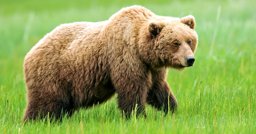

In [ ]:
os.makedirs('images', exist_ok=True)
download_url(urls[0], 'images/bear.jpg')
im = Image.open('images/bear.jpg')
im.thumbnail((256,256))
im